In [1]:
import pandas as pd
import uproot
import glob
import tqdm

df = pd.DataFrame()
directory = "/eos/purdue/store/data/Run2016B/SingleMuon/NANOAOD/02Apr2020_ver2-v1/20000/"

for filename in tqdm.tqdm(glob.glob(directory+"*.root")):
    fn = filename.split("/")[-1].replace(".root", "")
    tree = uproot.open(filename)["Events"]
    for column in tree.keys():
        df.loc[f"{column}_{fn}", "compressed_bytes"] = tree[column].compressed_bytes/tree.num_entries
        df.loc[f"{column}_{fn}", "uncompressed_bytes"] = tree[column].uncompressed_bytes/tree.num_entries

100%|██████████| 72/72 [08:01<00:00,  6.69s/it]


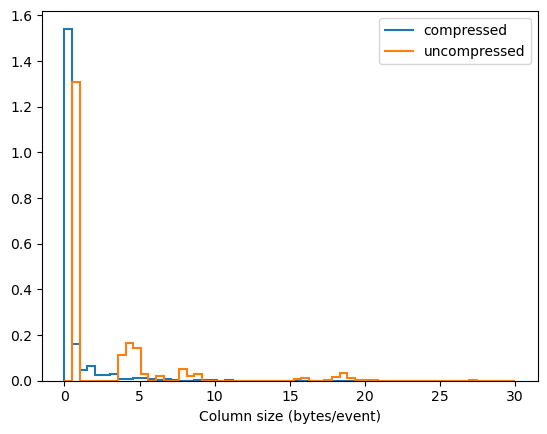

In [2]:
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np

bins = np.linspace(0, 30, 60)
hep.histplot(
    np.histogram(df.compressed_bytes, bins),
    label="compressed",
    density=True
)
hep.histplot(
    np.histogram(df.uncompressed_bytes, bins),
    label="uncompressed",
    density=True
)

plt.xlabel('Column size (bytes/event)')
plt.legend()

plt.show()

In [3]:
cutoffs = [2,5,10]

for cutoff in cutoffs:
    fraction = df[df.uncompressed_bytes<cutoff].shape[0] / df.shape[0]
    percent = round(fraction*100)
    print(f"{percent}% of columns are <{cutoff} bytes per event (uncompressed)")

67% of columns are <2 bytes per event (uncompressed)
87% of columns are <5 bytes per event (uncompressed)
96% of columns are <10 bytes per event (uncompressed)
